In [1]:
import pandas as pd

movies_df =  pd.read_csv('movies_dataset.csv', lineterminator='\n')
movies_df.head()


,genre_ids,id,original_language,overview,popularity,release_date,title,vote_average,vote_count
0,"[878, 28, 12]",580489,en,After finding a host body in investigative rep...,6972.003,2021-09-30,Venom: Let There Be Carnage,7.2,4500
1,"[28, 35, 80, 53]",512195,en,An Interpol-issued Red Notice is a global aler...,4496.760,2021-11-04,Red Notice,6.8,2016
2,"[28, 12, 878, 14]",634649,en,Peter Parker is unmasked and no longer able to...,4062.446,2021-12-15,Spider-Man: No Way Home,8.4,84
3,"[16, 35, 10751]",585245,en,As Emily struggles to fit in at home and at sc...,2509.512,2021-11-10,Clifford the Big Red Dog,7.6,568
4,"[28, 12, 14]",566525,en,Shang-Chi must confront the past he thought he...,2453.799,2021-09-01,Shang-Chi and the Legend of the Ten Rings,7.8,4244


In [3]:


try:
    movies_df = pd.read_csv(file_path, delimiter=None, engine='python')
except Exception as e:
    error_message = str(e)

if 'movies_df' in locals():
    display_data = movies_df.head()
else:
    display_data = error_message

display_data



,genre_ids,id,original_language,overview,popularity,release_date,title,vote_average,vote_count
0,"[878, 28, 12]",580489,en,After finding a host body in investigative rep...,6972.003,2021-09-30,Venom: Let There Be Carnage,7.2,4500
1,"[28, 35, 80, 53]",512195,en,An Interpol-issued Red Notice is a global aler...,4496.760,2021-11-04,Red Notice,6.8,2016
2,"[28, 12, 878, 14]",634649,en,Peter Parker is unmasked and no longer able to...,4062.446,2021-12-15,Spider-Man: No Way Home,8.4,84
3,"[16, 35, 10751]",585245,en,As Emily struggles to fit in at home and at sc...,2509.512,2021-11-10,Clifford the Big Red Dog,7.6,568
4,"[28, 12, 14]",566525,en,Shang-Chi must confront the past he thought he...,2453.799,2021-09-01,Shang-Chi and the Legend of the Ten Rings,7.8,4244


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np


movies_df = movies_df.dropna(subset=['overview'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['overview'])


cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_movie_suggestions(title, number_of_suggestions=5):
    # Find the index of the movie that matches the title
    idx = movies_df.index[movies_df['title'] == title].tolist()
    if not idx:
        return f"No movie found with title '{title}'."

    sim_scores = list(enumerate(cosine_similarities[idx[0]]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:number_of_suggestions + 1]

    movie_indices = [i[0] for i in sim_scores]

    return movies_df['title'].iloc[movie_indices].tolist()

test_movie = "Venom: Let There Be Carnage"
suggestions = get_movie_suggestions(test_movie, 5)
suggestions



['Venom', 'Spider-Man 3', 'Mr. Brooks', 'A Little Christmas Charm', 'Copycat']

In [5]:
import ipywidgets as widgets
from IPython.display import display

movie_input = widgets.Text(
    value="Toy Story",
    description="Movie Title:",
    placeholder='Type a movie title...'
)
movie_list = widgets.Output()

def on_type(data):
    with movie_list:
        movie_list.clear_output()
        title = data['new']
        if len(title) >= 5:
            suggestions = get_movie_suggestions(title, 5)
            if isinstance(suggestions, list):
                for suggestion in suggestions:
                    print(suggestion)
            else:
                print(suggestions)

movie_input.observe(on_type, names='value')

# Display the widget
display(movie_input, movie_list)


Text(value='Toy Story', description='Movie Title:', placeholder='Type a movie title...')

Output()

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the vote_average column
scaler = MinMaxScaler()
movies_df['normalized_vote_average'] = scaler.fit_transform(movies_df[['vote_average']])

def get_movie_suggestions_with_ratings(title, similarity_weight=0.8, rating_weight=0.2, number_of_suggestions=5):
    idx = movies_df.index[movies_df['title'] == title].tolist()
    if not idx:
        return f"No movie found with title '{title}'."

    sim_scores = list(enumerate(cosine_similarities[idx[0]]))

    for i in range(len(sim_scores)):
        sim_scores[i] = (sim_scores[i][0], 
                         similarity_weight * sim_scores[i][1] + 
                         rating_weight * movies_df.iloc[sim_scores[i][0]]['normalized_vote_average'])

    # Sort the movies based on the combined scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the most similar movies
    sim_scores = sim_scores[1:number_of_suggestions + 1]

    movie_indices = [i[0] for i in sim_scores]

    return movies_df['title'].iloc[movie_indices].tolist()

# Testing the function with a sample movie
test_movie = "Venom: Let There Be Carnage"
suggestions_with_ratings = get_movie_suggestions_with_ratings(test_movie, 5)
suggestions_with_ratings



['Venom', 'Spider-Man 3', 'Mr. Brooks', 'A Little Christmas Charm', 'Copycat']

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import MinMaxScaler



# Preprocess the data: remove rows where overview is NaN
movies_df = movies_df.dropna(subset=['overview'])

# Feature Extraction using TF-IDF on the 'overview' column
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['overview'])

# Calculate cosine similarities
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

scaler = MinMaxScaler()
movies_df['normalized_vote_average'] = scaler.fit_transform(movies_df[['vote_average']])

def get_movie_suggestions_with_ratings(title, similarity_weight=0.8, rating_weight=0.2, number_of_suggestions=5):
    # Find the index of the movie that matches the title
    idx = movies_df.index[movies_df['title'] == title].tolist()
    if not idx:
        return f"No movie found with title '{title}'."

    sim_scores = list(enumerate(cosine_similarities[idx[0]]))

    for i in range(len(sim_scores)):
        sim_scores[i] = (sim_scores[i][0], 
                         similarity_weight * sim_scores[i][1] + 
                         rating_weight * movies_df.iloc[sim_scores[i][0]]['normalized_vote_average'])

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:number_of_suggestions + 1]

    movie_indices = [i[0] for i in sim_scores]

    return movies_df['title'].iloc[movie_indices].tolist()

test_movie = "Venom: Let There Be Carnage"
suggestions_with_ratings = get_movie_suggestions_with_ratings(test_movie, 5)
suggestions_with_ratings



['Venom', 'Spider-Man 3', 'Mr. Brooks', 'A Little Christmas Charm', 'Copycat']

In [7]:
pip install sentence-transformers

     ---------------------------------------- 86.0/86.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125918 sha256=c5367d3eeb67b89eee242b31fae3afd34cc6b69f1d571bffd1d00764c51b81af
  Stored in directory: c:\users\prana\appdata\local\pip\cache\wheels\5e\6f\8c\d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


No sentence-transformers model found with name C:\Users\prana/.cache\torch\sentence_transformers\bert-base-uncased. Creating a new one with MEAN pooling.
<ipython-input-8-7969e60e4aa6>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_movies_df['clusters_bert'] = clusters_bert


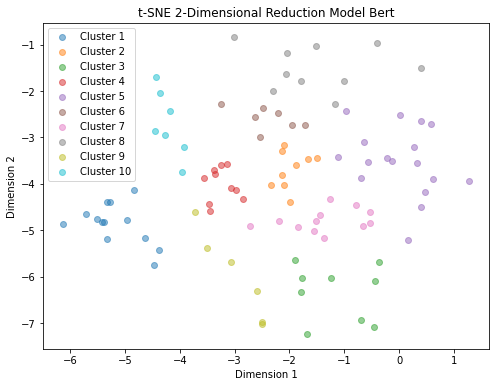

,title,clusters_bert
0,Venom: Let There Be Carnage,0
1,Red Notice,5
2,Spider-Man: No Way Home,0
3,Clifford the Big Red Dog,6
4,Shang-Chi and the Legend of the Ten Rings,3


In [8]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np


subset_movies_df = movies_df.head(100)  # Using the first 100 entries

model = SentenceTransformer('bert-base-uncased')
embeddings = model.encode(subset_movies_df['overview'].tolist())  # Using the 'overview' column

np.random.seed(1000)

tsne = TSNE(n_components=2, perplexity=40, random_state=1000)
Y = tsne.fit_transform(embeddings)

gmm = GaussianMixture(n_components=10, random_state=1000)
clusters_bert = gmm.fit_predict(Y)

subset_movies_df['clusters_bert'] = clusters_bert

colors = list(mcolors.TABLEAU_COLORS.values())[:max(clusters_bert)+1]  # ensuring enough colors
cols = [colors[cluster] for cluster in clusters_bert]

plt.figure(figsize=(8, 6))
for i, color in enumerate(colors):
    plt.scatter(Y[clusters_bert == i, 0], Y[clusters_bert == i, 1], c=color, label=f"Cluster {i+1}", alpha=0.5)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE 2-Dimensional Reduction Model Bert")
plt.legend()
plt.show()

subset_movies_df[['title', 'clusters_bert']].head()


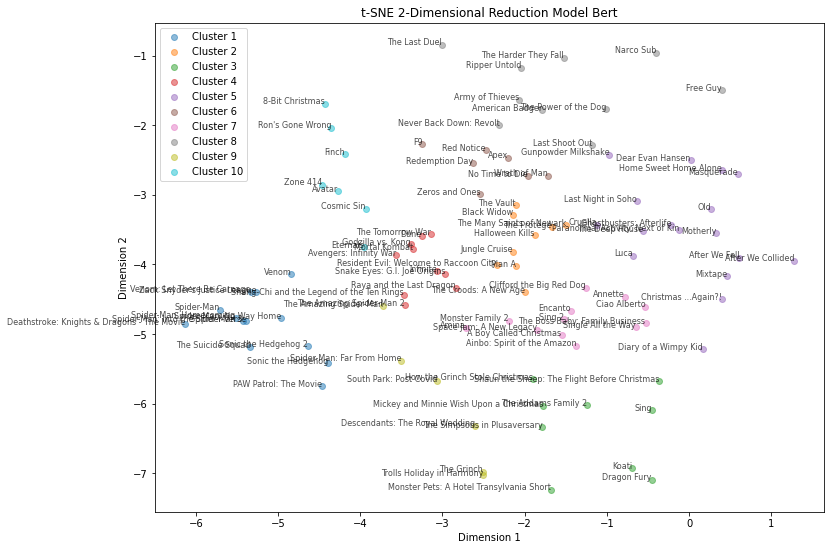

In [18]:
plt.figure(figsize=(12, 9))  # Increased plot size
for i, color in enumerate(colors):
    plt.scatter(Y[clusters_bert == i, 0], Y[clusters_bert == i, 1], c=color, label=f"Cluster {i+1}", alpha=0.5)
    for j, txt in enumerate(subset_movies_df['title']):
        if clusters_bert[j] == i:  # Annotate only points in the current cluster
            plt.annotate(txt, (Y[j, 0], Y[j, 1]), fontsize=8, alpha=0.7, ha='right')  # Reduced font size and adjusted alignment

plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("t-SNE 2-Dimensional Reduction Model Bert")
plt.legend()
plt.show()


In [17]:
import ipywidgets as widgets
from IPython.display import display

# Widget setup
cluster_input = widgets.IntSlider(
    min=0,
    max=max(subset_movies_df['clusters_bert']),
    value=0,
    description="Cluster:"
)
suggestions_list = widgets.Output()

def on_cluster_change(data):
    with suggestions_list:
        suggestions_list.clear_output()
        cluster = data['new']
        cluster_movies = subset_movies_df[subset_movies_df['clusters_bert'] == cluster]
        if len(cluster_movies) >= 1:
            for movie_title in cluster_movies['title']:
                print(movie_title)
        else:
            print(f"No movies found in Cluster {cluster}.")

cluster_input.observe(on_cluster_change, names='value')

# Display the widget
display(cluster_input, suggestions_list)

IntSlider(value=0, description='Cluster:', max=9)

Output()

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import MinMaxScaler
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


movies_df = movies_df.dropna(subset=['overview'])
scaler = MinMaxScaler()
movies_df['normalized_vote_average'] = scaler.fit_transform(movies_df[['vote_average']])
# TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['overview'])

# BERT
model = SentenceTransformer('bert-base-uncased')
bert_embeddings = model.encode(movies_df['overview'].tolist())
np.random.seed(1000)
tsne = TSNE(n_components=2, perplexity=40, random_state=1000)
Y = tsne.fit_transform(bert_embeddings)
gmm = GaussianMixture(n_components=10, random_state=1000)
clusters_bert = gmm.fit_predict(Y)
movies_df['clusters_bert'] = clusters_bert
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_movie_suggestions_with_ratings(title, similarity_weight=0.8, rating_weight=0.1, cluster_weight=0.1, number_of_suggestions=5):
    if title not in movies_df['title'].values:
        return f"No movie found with title '{title}'."

    idx = movies_df.index[movies_df['title'] == title].tolist()[0]

    movie_cluster = movies_df.at[idx, 'clusters_bert']

    sim_scores = list(enumerate(cosine_similarities[idx]))

    for i in range(len(sim_scores)):
        movie_idx = sim_scores[i][0]
        similarity_score = similarity_weight * sim_scores[i][1]
        rating_score = rating_weight * movies_df.iloc[movie_idx]['normalized_vote_average']
        if movies_df.iloc[movie_idx]['clusters_bert'] == movie_cluster:
            cluster_score = cluster_weight
        else:
            cluster_score = 0
        sim_scores[i] = (movie_idx, similarity_score + rating_score + cluster_score)

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    movie_indices = [i[0] for i in sim_scores[1:number_of_suggestions + 1]]

    return movies_df['title'].iloc[movie_indices].tolist()


No sentence-transformers model found with name C:\Users\prana/.cache\torch\sentence_transformers\bert-base-uncased. Creating a new one with MEAN pooling.


In [21]:
test_movie = "Toy Story"
suggestions = get_movie_suggestions_with_ratings(test_movie, number_of_suggestions=5)
print(suggestions)

['Toy Story 3', 'Toy Story 2', 'Toy Story 4', 'Small Fry', 'Buzz Lightyear of Star Command: The Adventure Begins']


In [23]:
import ipywidgets as widgets
from IPython.display import display

# Create a text input widget for entering movie titles
movie_title_input = widgets.Text(
    value="",  # No default value
    description="Enter Movie Title:",
    placeholder='Type here to search for movies...'
)

# Create an output widget to display the list of movie suggestions
movie_suggestions_output = widgets.Output()

def display_movie_suggestions(change):
    # Update the movie suggestions whenever the text input changes
    with movie_suggestions_output:
        movie_suggestions_output.clear_output()
        entered_title = change.new
        if len(entered_title) >= 5:  # Trigger suggestions for titles with 5 or more characters
            suggestions = get_movie_suggestions_with_ratings(entered_title, number_of_suggestions=5)
            if isinstance(suggestions, list):
                for movie in suggestions:
                    print(movie)
            else:
                print(suggestions)

# Set up an observer on the text input widget to call the above function when the value changes
movie_title_input.observe(display_movie_suggestions, names='value')

# Display the text input and movie suggestions output widgets
display(movie_title_input, movie_suggestions_output)


Text(value='', description='Enter Movie Title:', placeholder='Type here to search for movies...')

Output()